<a href="https://colab.research.google.com/github/AW17321/EEC-179/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, r2_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

iris = load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])
#display(df)
'''
df.plot(kind='scatter', x='target', y='sepal length (cm)',)
df.plot(kind='scatter', x='target', y='sepal width (cm)',)
df.plot(kind='scatter', x='target', y='petal length (cm)',)
df.plot(kind='scatter', x='target', y='petal width (cm)',)
'''

#Split dataset
x = df['target']
y = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

x1 = x_train.values
x2 = x_test.values

y1 = y_train['sepal length (cm)'].values
y2 = y_train['sepal width (cm)'].values
y3 = y_train['petal length (cm)'].values
y4 = y_train['petal width (cm)'].values

log_regression = LogisticRegression()
log_regression.fit(x1,y1)
y_pred = log_regression.predict(x2)
plt.plot(x2,y_pred)


ValueError: Expected 2D array, got 1D array instead:
array=[0. 0. 1. 0. 0. 2. 1. 0. 0. 0. 2. 1. 1. 0. 0. 1. 2. 2. 1. 2. 1. 2. 1. 0.
 2. 1. 0. 0. 0. 1. 2. 0. 0. 0. 1. 0. 1. 2. 0. 1. 2. 0. 2. 2. 1. 1. 2. 1.
 0. 1. 2. 0. 0. 1. 1. 0. 2. 0. 0. 1. 1. 2. 1. 2. 2. 1. 0. 0. 2. 2. 0. 0.
 0. 1. 2. 0. 2. 2. 0. 1. 1. 2. 1. 2. 0. 2. 1. 2. 1. 1. 1. 0. 1. 1. 0. 1.
 2. 2. 0. 1. 2. 2. 0. 2. 0. 1. 2. 2. 1. 2. 1. 1. 2. 2. 0. 1. 2. 0. 1. 2.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

Dataset shape: (20640, 9)

Column data types:
 MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
Target        float64
dtype: object

Linear Regression Coefficients: [ 0.43688279 -0.04042962 -0.00382602]
Intercept: 0.6081056931392581

Linear MSE: 0.7007
Linear R^2: 0.4653

Ridge Regression Coefficients: [ 0.43688271 -0.04042959 -0.00382602]
Intercept: 0.6081058731219744

Ridge MSE: 0.7007
Ridge R^2: 0.4653

Lasso Regression Coefficients: [ 0.4329231  -0.03761152 -0.0037342 ]
Intercept: 0.6078708613113057

Lasso MSE: 0.7003
Lasso R^2: 0.4656

Elastic Net Regression Coefficients: [ 0.43420993 -0.03880072 -0.00377723]
Intercept: 0.6094738276385347

Elastic Net MSE: 0.7005
Elastic Net R^2: 0.4655


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.689e+03, tolerance: 2.207e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent

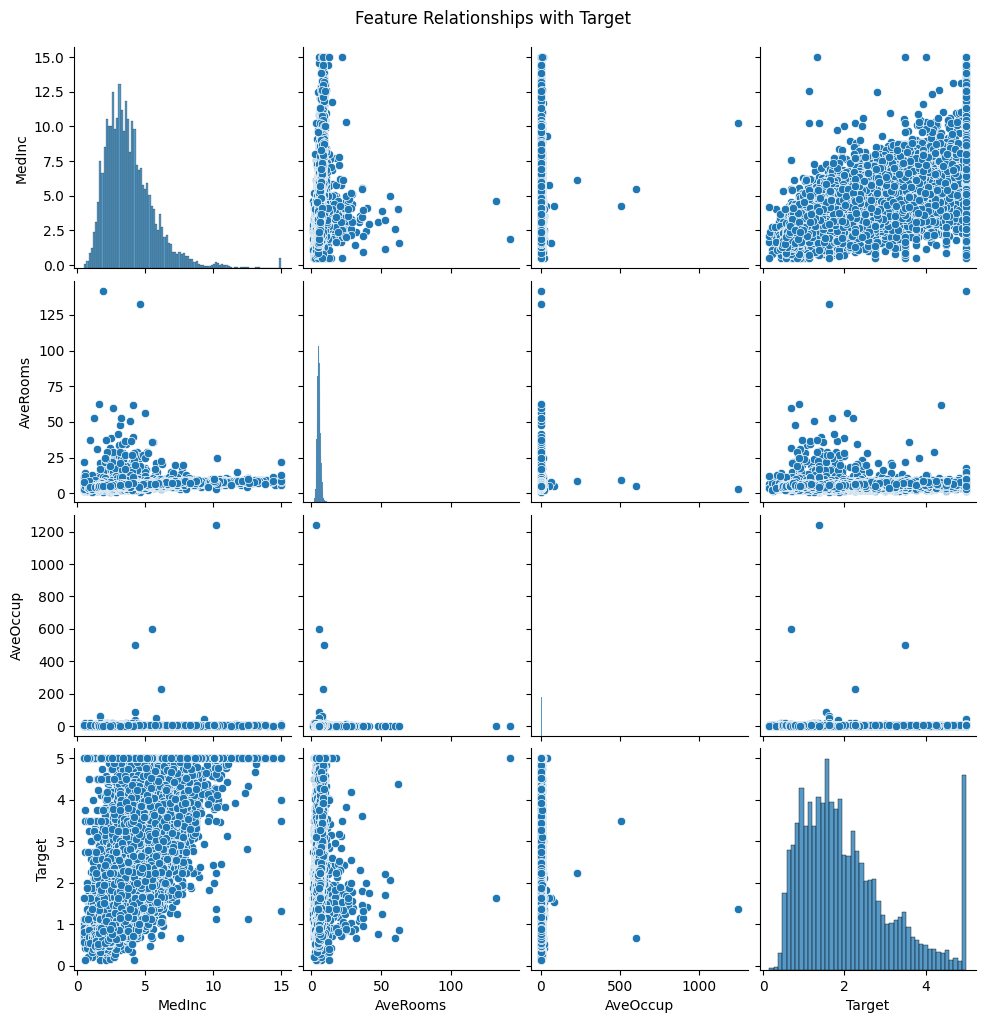

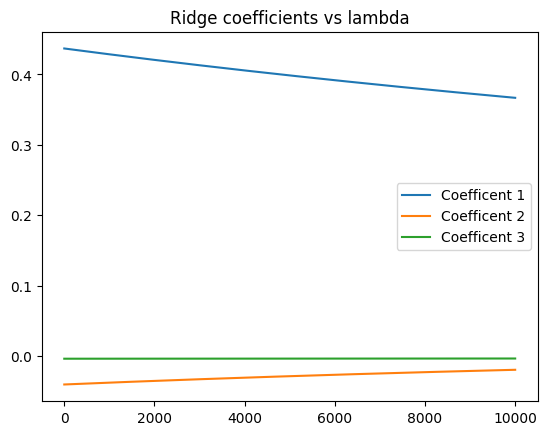

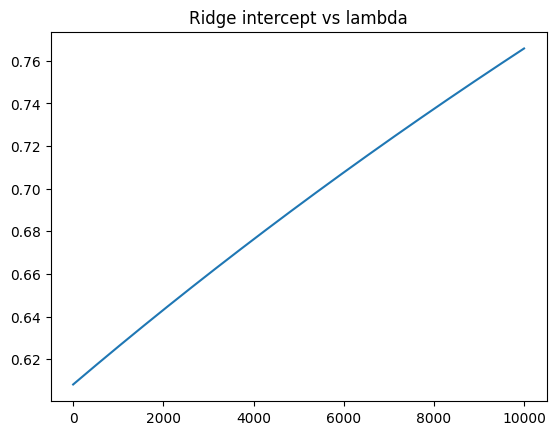

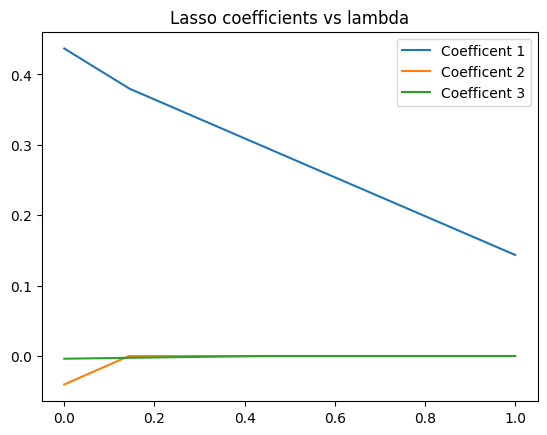

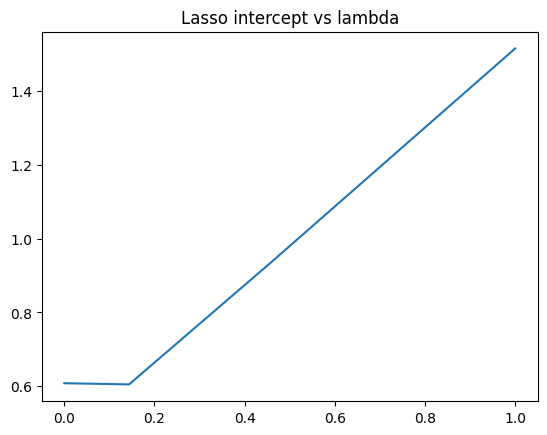

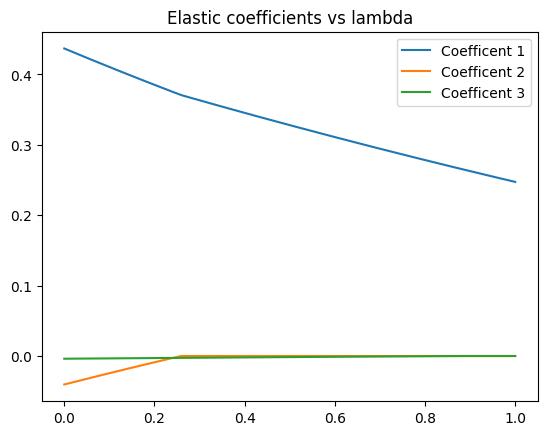

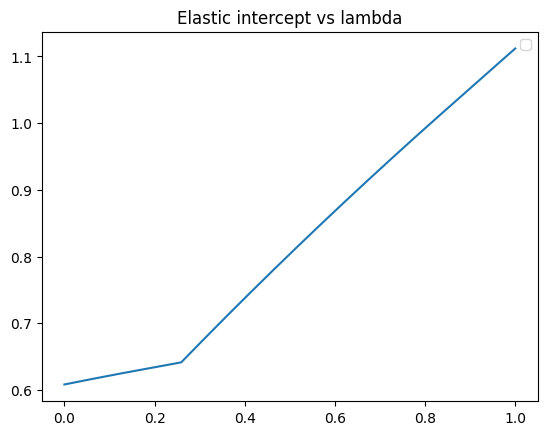

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from decimal import Decimal

from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

#data
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df['Target'] = california.target

print("Dataset shape:", df.shape)
print("\nColumn data types:\n", df.dtypes)

sns.pairplot(df[['MedInc', 'AveRooms', 'AveOccup', 'Target']])
plt.suptitle("Feature Relationships with Target", y=1.02)


X = df[['MedInc', 'AveRooms', 'AveOccup']]
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#linear
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
print("\nLinear Regression Coefficients:", lin_reg.coef_)
print("Intercept:", lin_reg.intercept_)
y_pred_linear = lin_reg.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print(f"\nLinear MSE: {mse_linear:.4f}")
print(f"Linear R^2: {r2_linear:.4f}")

#ridge
ridge = Ridge(alpha = 0.01)
ridge.fit(X_train, y_train)
print("\nRidge Regression Coefficients:", ridge.coef_)
print("Intercept:", ridge.intercept_)
y_pred_ridge = ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"\nRidge MSE: {mse_ridge:.4f}")
print(f"Ridge R^2: {r2_ridge:.4f}")

#lasso
lasso = Lasso(alpha = 0.01).fit(X_train, y_train)
print("\nLasso Regression Coefficients:", lasso.coef_)
print("Intercept:", lasso.intercept_)
y_pred_lasso = lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"\nLasso MSE: {mse_lasso:.4f}")
print(f"Lasso R^2: {r2_lasso:.4f}")

#eNet
eNet = ElasticNet(alpha = 0.01).fit(X_train, y_train)
print("\nElastic Net Regression Coefficients:", eNet.coef_)
print("Intercept:", eNet.intercept_)
y_pred_eNet = eNet.predict(X_test)
mse_eNet = mean_squared_error(y_test, y_pred_eNet)
r2_eNet = r2_score(y_test, y_pred_eNet)
print(f"\nElastic Net MSE: {mse_eNet:.4f}")
print(f"Elastic Net R^2: {r2_eNet:.4f}")

#7-Ridge
i1 = np.zeros(10000)
Rcoe0 = np.zeros(10000)
Rcoe1 = np.zeros(10000)
Rcoe2 = np.zeros(10000)
Rintercept = np.zeros(10000)
for i in range(0, 10000):
  ridge = Ridge(alpha = i)
  ridge.fit(X_train, y_train)

  #print(ridge.coef_)
  #print(ridge.intercept_)
  #print(ridge.coef_[0])
  i1[i] = i
  Rcoe0[i] = Decimal(ridge.coef_[0])
  Rcoe1[i] = Decimal(ridge.coef_[1])
  Rcoe2[i] = Decimal(ridge.coef_[2])
  Rintercept[i] = Decimal(ridge.intercept_)

plt.figure()
plt.plot(i1,Rcoe0,label='Coefficent 1')
plt.plot(i1,Rcoe1,label='Coefficent 2')
plt.plot(i1,Rcoe2,label='Coefficent 3')
plt.title("Ridge coefficients vs lambda")
plt.legend()

plt.figure()
plt.plot(i1,Rintercept)
plt.title("Ridge intercept vs lambda")

#7-Lasso
i2 = np.zeros(10000)
Rcoe3 = np.zeros(10000)
Rcoe4 = np.zeros(10000)
Rcoe5 = np.zeros(10000)
Rintercept2 = np.zeros(10000)
for i in range(0, 10000):
  lasso = Lasso(alpha = i/10000).fit(X_train, y_train)
  i2[i] = i/10000
  Rcoe3[i] = Decimal(lasso.coef_[0])
  Rcoe4[i] = Decimal(lasso.coef_[1])
  Rcoe5[i] = Decimal(lasso.coef_[2])
  Rintercept2[i] = Decimal(lasso.intercept_)

plt.figure()
plt.plot(i2,Rcoe3,label='Coefficent 1')
plt.plot(i2,Rcoe4,label='Coefficent 2')
plt.plot(i2,Rcoe5,label='Coefficent 3')
plt.title("Lasso coefficients vs lambda")
plt.legend()

plt.figure()
plt.plot(i2,Rintercept2)
plt.title("Lasso intercept vs lambda")

#7-Elastic
i3 = np.zeros(10000)
Rcoe6 = np.zeros(10000)
Rcoe7 = np.zeros(10000)
Rcoe8 = np.zeros(10000)
Rintercept3 = np.zeros(10000)
for i in range(0, 10000):
  eNet = ElasticNet(alpha = i/10000).fit(X_train, y_train)
  i3[i] = i/10000
  Rcoe6[i] = Decimal(eNet.coef_[0])
  Rcoe7[i] = Decimal(eNet.coef_[1])
  Rcoe8[i] = Decimal(eNet.coef_[2])
  Rintercept3[i] = Decimal(eNet.intercept_)

plt.figure()
plt.plot(i3,Rcoe6,label='Coefficent 1')
plt.plot(i3,Rcoe7,label='Coefficent 2')
plt.plot(i3,Rcoe8,label='Coefficent 3')
plt.title("Elastic coefficients vs lambda")
plt.legend()

plt.figure()
plt.plot(i3,Rintercept3)
plt.title("Elastic intercept vs lambda")
plt.legend()
plt.show()